In [ ]:
==============================================================================================================

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('sampledata2.csv',index_col='Year',parse_dates=True)
df.index.freq='AS'

In [16]:
df.sample()

,PrecipMean,Product
Year,,
1983-01-01,35.2,5516819


In [17]:
df.tail()

,PrecipMean,Product
Year,,
2016-01-01,53.9,25987204
2017-01-01,55.4,25191722
2018-01-01,57.6,25428204
2019-01-01,58.5,25123792
2020-01-01,56.9,25422755


<AxesSubplot:xlabel='Year'>

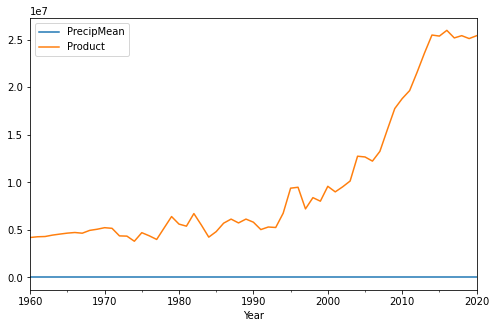

In [18]:
df.plot(figsize=(8,5))

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
import pandas.util.testing as tm

C:\Users\Ermi\AppData\Local\Temp\ipykernel_10380\2885143518.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


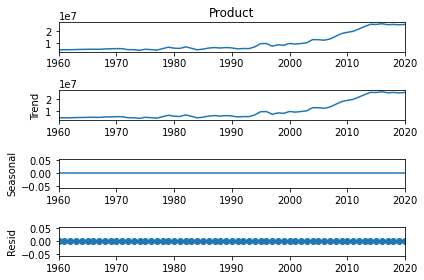

In [21]:
results = seasonal_decompose(df['Product'])
results.plot();

In [22]:
len(df)

61

In [23]:
train = df.iloc[:56]
test = df.iloc[56:]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
df.head(), df.tail()

(            PrecipMean  Product
 Year                           
 1960-01-01        32.4  4203000
 1961-01-01        32.5  4279000
 1962-01-01        32.4  4304000
 1963-01-01        32.8  4453700
 1964-01-01        32.9  4561100,
             PrecipMean   Product
 Year                            
 2016-01-01        53.9  25987204
 2017-01-01        55.4  25191722
 2018-01-01        57.6  25428204
 2019-01-01        58.5  25123792
 2020-01-01        56.9  25422755)

In [26]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [27]:
scaled_train[:10]

array([[0.        , 0.01818143],
       [0.00531915, 0.02168592],
       [0.        , 0.02283872],
       [0.0212766 , 0.02974166],
       [0.02659574, 0.03469407],
       [0.04255319, 0.03931908],
       [0.04255319, 0.04230713],
       [0.04255319, 0.03894096],
       [0.03723404, 0.0526454 ],
       [0.03723404, 0.0581742 ]])

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.01818143 0.00531915 0.02168592 0.         0.02283872]
Predict this y: 
 [[0.0212766  0.02974166]]


In [31]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00531915 0.02168592 0.         0.02283872 0.0212766  0.02974166]
Predict this y: 
 [[0.02659574 0.03469407]]


In [32]:
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02283872 0.0212766  0.02974166 0.02659574 0.03469407]
Predict this y: 
 [[0.04255319 0.03931908]]


In [33]:
X,y = generator[3]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.0212766  0.02974166 0.02659574 0.03469407 0.04255319 0.03931908]
Predict this y: 
 [[0.04255319 0.04230713]]


In [35]:
X.shape  # for every single input, it considers a batch of 3 features at a time and results 4 outputs as an array

(1, 3, 2)

In [36]:
n_input = 5
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [38]:
# define model
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(n_input, n_features))) # 100 neurons
model.add(Dense(10))
model.compile(optimizer='adam', loss='mse')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
Total params: 590
Trainable params: 590
Non-trainable params: 0
_________________________________________________________________


In [52]:
# model.add(Dense(56, activation = 'softmax'))

In [40]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/lstm/TensorArrayUnstack/TensorListFromTensor' defined at (most recent call last):
    File "C:\Users\Ermi\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Ermi\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\traitlets\config\application.py", line 972, in launch_instance
      app.start()
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Ermi\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Ermi\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Ermi\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ermi\AppData\Local\Temp\ipykernel_10380\2037527338.py", line 2, in <cell line: 2>
      model.fit(generator,epochs=10)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\layers\rnn\base_rnn.py", line 515, in __call__
      return super(RNN, self).__call__(inputs, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\layers\rnn\lstm.py", line 574, in call
      last_output, outputs, states = backend.rnn(
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\backend.py", line 4612, in rnn
      input_ta = tuple(
    File "c:\users\ermi\webmlapp1\.env\lib\site-packages\keras\backend.py", line 4613, in <genexpr>
      ta.unstack(input_) if not go_backwards else ta
Node: 'sequential/lstm/TensorArrayUnstack/TensorListFromTensor'
Specified a list with shape [?,1] from a tensor with shape [1,2]
	 [[{{node sequential/lstm/TensorArrayUnstack/TensorListFromTensor}}]] [Op:__inference_train_function_1810]

In [66]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

KeyError: 'loss'

In [ ]:
last_train_batch = scaled_train[-6:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1);

In [ ]:
test_predictions

In [ ]:
test.head()

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

In [ ]:
=========================================================================================================================